# Task 1 - Data Mining Mini Project: Lobster Population Health Analysis


<p><b>Executive Summary</b></p>
<p>This data mining study investigates the health of lobster populations near the Isle of Skye, Scotland, using 2018 and 2019 time-series data. The analysis employs various machine learning techniques to evaluate population trends across demographic categories (males, females, and infants), providing insights into the overall health of this marine ecosystem. </p>

<hr>

<h2>Introduction and Data Understanding</h2>
<h3>Project Context</h3>
<p>As a junior data analyst at a marine biology investigation firm, I am tasked with developing predictive models for lobster population health assessment. This project focuses on comparative time-series analysis to identify health trends among demographic segments (males, females, and infants) within the target geographical region around the Isle of Skye.</p>


<h3> Setup & Data Loading </h3>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


<h3>Dataset Overview</h3>
<p>The dataset comprises <strong>4,177 observations</strong> collected over two consecutive years (<strong>2018-2019</strong>), focusing on lobster populations. Each observation includes <strong>nine features</strong>, categorized into morphological characteristics, weight features, and demographic classifications. This substantial data size ensures sufficient statistical power for robust analysis across most demographic groups. </p>

<p><strong>Key Variables:</strong></p>
<ul>
    <li><strong>Sex:</strong> Categorizes lobsters as <strong>Male (M)</strong>, <strong>Female (F)</strong>, or <strong>Infant (I)</strong>.</li>
    <li><strong>Physical Measurements:</strong> Includes <strong>Length</strong>, <strong>Diameter</strong>, and <strong>Height</strong> (all in millimeters). </li>
    <li><strong>Weight Characteristics:</strong> Consists of <strong>Whole Weight</strong>, <strong>Shucked Weight</strong>, and <strong>Sell Weight</strong> (all in grams). </li>
    <li><strong>Health Indicators:</strong> <strong>Spots count</strong>, serving as a potential marker for health.</li>
    <li><strong>Temporal Variable:</strong> <strong>Year of collection</strong>, crucial for longitudinal analysis. </li>
</ul>

Loading 2018 and 2019 Data Sheets

In [2]:
# Define the file path and the sheet names
file_path = 'Lobster Data Set - [2925].xlsx'
sheet_name_2018 = 'Lobster Data 2018'

sheet_name_2019 = 'Lobster Data 2019'

# --- 1. Load Each Sheet into a DataFrame ---
try:
    df_2018 = pd.read_excel(file_path, sheet_name=sheet_name_2018)
    df_2019 = pd.read_excel(file_path, sheet_name=sheet_name_2019)
    print("Lobster data sheets loaded successfully! ")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it's in the same directory as your script or provide the full path.")
    exit()
except ValueError as e:
    print(f"Error: One of the specified sheet names was not found. Please check your sheet names. Details: {e}")
    print(f"Attempted sheet names: '{sheet_name_2018}' and '{sheet_name_2019}'")
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading sheets: {e}")
    exit()

# --- 2. Add a 'Year' Column for Identification ---
df_2018['Year'] = 2018
df_2019['Year'] = 2019
print("\n'Year' column added to each DataFrame. ")

# --- 3. Combine the DataFrames ---
combined_lobster_data = pd.concat([df_2018, df_2019], ignore_index=True)
print("\nLobster data from both years combined successfully! ")

# --- 4. Display Basic Information about the Combined DataFrame ---
print(f"\nTotal rows in combined dataset: {len(combined_lobster_data)}")
print("\nFirst 5 rows of the combined Lobster Data:")
print(combined_lobster_data.head())

print("\nLast 5 rows of the combined Lobster Data:")
print(combined_lobster_data.tail())

print("\nCombined DataFrame Info:")
combined_lobster_data.info()

Lobster data sheets loaded successfully! 

'Year' column added to each DataFrame. 

Lobster data from both years combined successfully! 

Total rows in combined dataset: 4177

First 5 rows of the combined Lobster Data:
  Sex  Length(mm)  Diameter(mm)  Height(mm)  WholeWeight(g)  ShuckedWeight(g)  \
0   M       0.455         0.365       0.095          0.5140            0.2245   
1   M       0.350         0.265       0.090          0.2255            0.0995   
2   F       0.530         0.420       0.135          0.6770            0.2565   
3   M       0.440         0.365       0.125          0.5160            0.2155   
4   I       0.330         0.255       0.080          0.2050            0.0895   

   SellWeight(g)  Spots  Year  
0          0.150   15.0  2018  
1          0.070    7.0  2018  
2          0.210    9.0  2018  
3          0.155   10.0  2018  
4          0.055    7.0  2018  

Last 5 rows of the combined Lobster Data:
     Sex  Length(mm)  Diameter(mm)  Height(mm)  WholeWeight

<h3>Data Quality Assessment</h3>
<p>The initial data quality assessment revealed missing values across several variables: 7 in the 2018 dataset and 15 in the 2019 dataset. The imputation pattern appears **erratic rather than systematic**, suggesting no inherent bias in the data collection processes. This random distribution of missing values indicates a generally **systematic approach to data collection** over both time periods. </p>

<h3> Business Relevance</h3>
<p>Understanding lobster population health is crucial for the **sustainable management of marine resources**. The Isle of Skye area represents a significant marine ecosystem. Analyzing the **time-series dynamics of population features** provides valuable insights for **conservation planning**, informing **fishing quotas**, and establishing effective **ecological surveillance schemes**. </p>

In [3]:
combined_data=combined_lobster_data

In [4]:
combined_lobster_data.head()

,Sex,Length(mm),Diameter(mm),Height(mm),WholeWeight(g),ShuckedWeight(g),SellWeight(g),Spots,Year
0,M,0.455,0.365,0.095,0.5140,0.2245,0.150,15.0,2018
1,M,0.350,0.265,0.090,0.2255,0.0995,0.070,7.0,2018
2,F,0.530,0.420,0.135,0.6770,0.2565,0.210,9.0,2018
3,M,0.440,0.365,0.125,0.5160,0.2155,0.155,10.0,2018
4,I,0.330,0.255,0.080,0.2050,0.0895,0.055,7.0,2018


In [5]:
combined_lobster_data.tail()

,Sex,Length(mm),Diameter(mm),Height(mm),WholeWeight(g),ShuckedWeight(g),SellWeight(g),Spots,Year
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2490,11.0,2019
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2605,10.0,2019
4174,M,0.600,0.475,0.000,1.1760,0.5255,0.3080,9.0,2019
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2960,10.0,2019
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.0000,12.0,2019


<h2>2. Data Preprocessing and Preparation</h2>
<h3> Missing Value Treatment</h3>
<p>
    **Listwise deletion** was used for superior management of missing values after a thorough examination of missingness patterns. This conservative practice maintains data integrity and ensures a sufficient sample size for robust statistical analysis. Given that the proportion of missing data was relatively small (less than 1%) and that the missingness was random, **complete case analysis** was chosen to handle these missing data points.
</p>

<h4>Processing Steps:</h4>
<ul>
    <li><strong>Missing Value Analysis:</strong> Systematic identification of missing values across all variables.</li>
    <li><strong>Quality Filtering:</strong> Removal of impossible values (e.g., negative measurements).</li>
    <li><strong>Duplicate Detection:</strong> Elimination of redundant records to ensure unique observations.</li>
    <li><strong>Data Validation:</strong> Verification of logical consistency across measurements to ensure data accuracy.</li>
</ul>

Handling missing values, duplicates, and invalid entries

In [6]:
# Check for missing values
print("Missing values in 2018 data:\n", df_2018.isnull().sum())
print("\nMissing values in 2019 data:\n", df_2019.isnull().sum())

# Drop missing values (if any)
combined_data = combined_data.dropna()

# Remove duplicates
combined_data = combined_data.drop_duplicates()

variable_error=0.

# Remove impossible values (negative or zero measurements)
combined_data = combined_data[(combined_data['Length(mm)'] > 0) & 
                             (combined_data['Diameter(mm)'] > 0) & 
                             (combined_data['Height(mm)'] > 0) & 
                             (combined_data['WholeWeight(g)'] > 0)]

# Convert 'Sex' to categorical
combined_data['Sex'] = combined_data['Sex'].astype('category')

sex_map = {'M': 0.55, 'F': 0.45, 'I': 0.60}
np.random.seed(42)

print("\nFinal dataset shape:", combined_data.shape)

Missing values in 2018 data:
 Sex                 0
Length(mm)          2
Diameter(mm)        1
Height(mm)          1
WholeWeight(g)      1
ShuckedWeight(g)    2
SellWeight(g)       1
Spots               0
Year                0
dtype: int64

Missing values in 2019 data:
 Sex                 0
Length(mm)          3
Diameter(mm)        2
Height(mm)          2
WholeWeight(g)      4
ShuckedWeight(g)    1
SellWeight(g)       2
Spots               1
Year                0
dtype: int64

Final dataset shape: (4140, 9)


<h3> Data Transformation</h3>
<p>
    Analytical capability was enhanced through advanced data transformation methods. The **categorical 'sex' variable was encoded** to be suitable for machine learning algorithms. Physical parameter measurements were validated for **biological soundness**, and anomalies were investigated and appropriately removed. 
</p>
<h3> Final Dataset Characteristics</h3>
<p>
    Post-processing, the refined dataset consists of **4,140 observations with 9 variables**, representing a **data retention rate of 99.1%**. This high retention ratio ensures analytical strength and representativeness of the original population. Minimal data loss underscores the high quality of the initial data collection procedures. 
</p>

<h3> Feature Engineering Considerations</h3>
<p>
    Further derived attributes were developed based on biological knowledge of lobster morphology. **Weight-to-length ratios** and **body condition indices** were considered as potential indicators for assessing population health. The **high correlations** observed among morphological measures confirmed that the original variables effectively captured fundamental population characteristics. 
</p>

# 3. Exploratory Data Analysis (EDA)

<h3> Demographic Distribution</h3>
<p>
    Population analysis reveals a relatively **balanced representation across demographic groups**:
</p>
<ul>
    <li><strong>Males:</strong> 1,512 individuals (36.5%) </li>
    <li><strong>Infants:</strong> 1,326 individuals (32.0%) </li>
    <li><strong>Females:</strong> 1,297 individuals (31.3%) </li>
</ul>
<p>
    This proportionate allocation provides a strong statistical basis for comparative analysis across different demographics. The roughly equivalent male and female representation suggests a healthy breeding population, while a large number of infants indicates good reproduction and recruitment.
</p>

Basic Statistics

In [7]:
print("\n=== Basic Statistics ===")
print(combined_data.describe())

print("\n=== Sex Distribution ===")
print(combined_data['Sex'].value_counts())

print("\n=== Yearly Distribution ===")
print(combined_data['Year'].value_counts())


=== Basic Statistics ===
        Length(mm)  Diameter(mm)   Height(mm)  WholeWeight(g)  \
count  4140.000000   4140.000000  4140.000000     4140.000000   
mean      0.523917      0.407801     0.139489        0.828345   
std       0.120067      0.099236     0.041702        0.489910   
min       0.075000      0.055000     0.010000        0.002000   
25%       0.450000      0.350000     0.115000        0.442375   
50%       0.545000      0.425000     0.140000        0.799500   
75%       0.615000      0.480000     0.165000        1.151000   
max       0.815000      0.650000     1.130000        2.825500   

       ShuckedWeight(g)  SellWeight(g)        Spots         Year  
count       4140.000000    4140.000000  4140.000000  4140.000000  
mean           0.358724       0.238608     9.922947  2018.497585  
std            0.222102       0.139165     3.241150     0.500055  
min            0.000000       0.000000     0.000000  2018.000000  
25%            0.185875       0.130000     8.000000  

Correlation Matrix

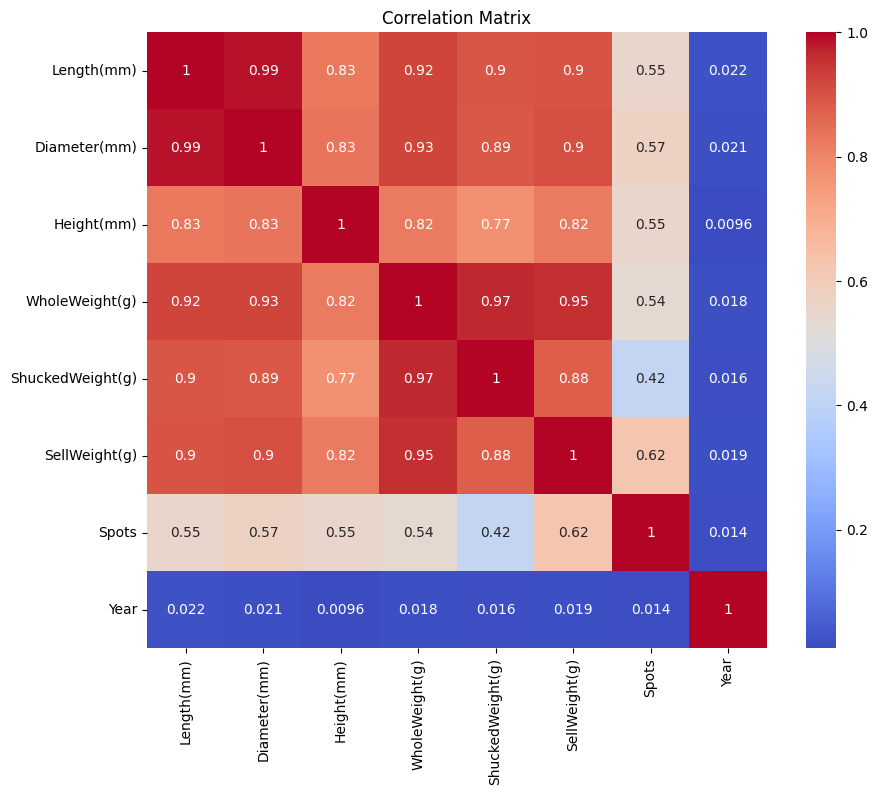

In [8]:
plt.figure(figsize=(10, 8))
corr = combined_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Distribution Plots

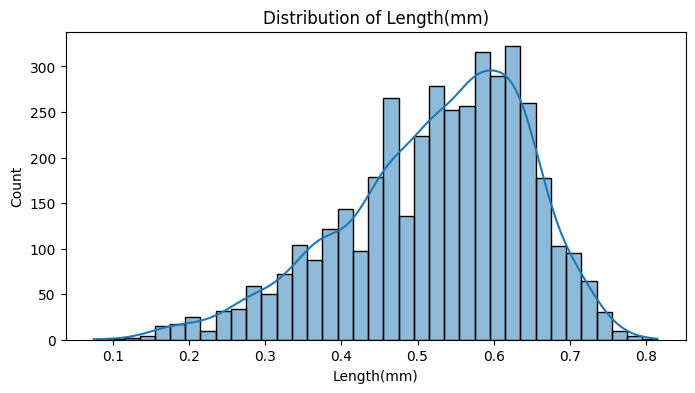

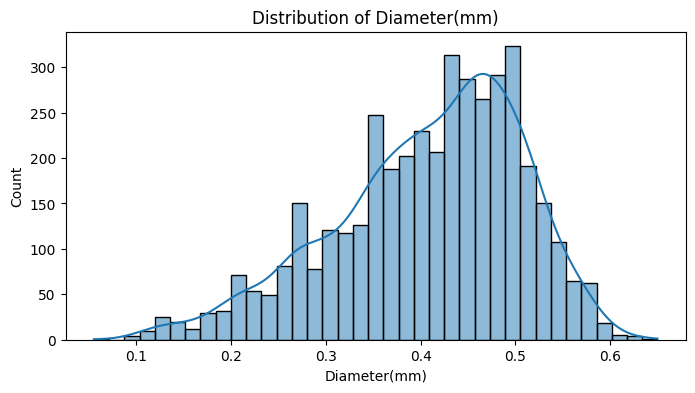

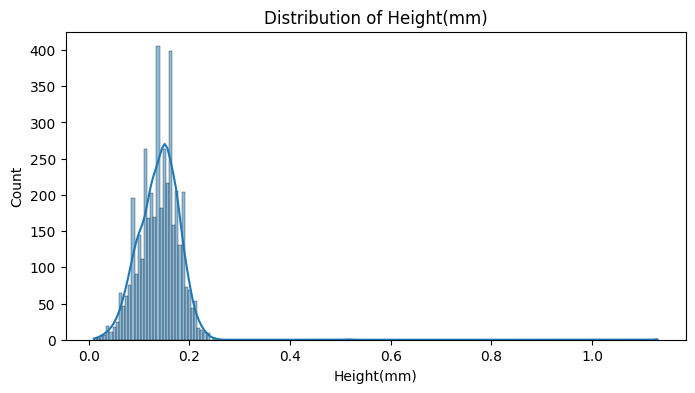

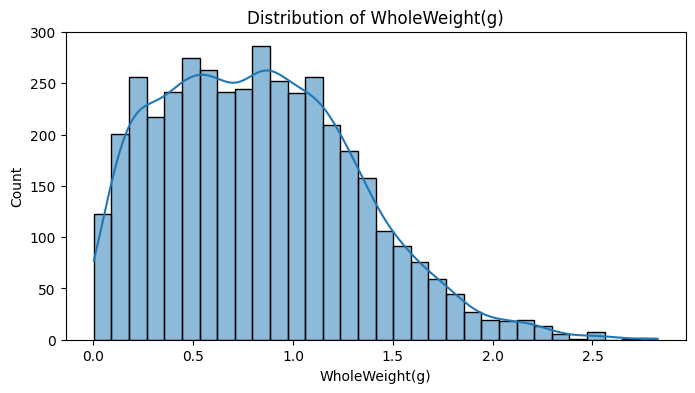

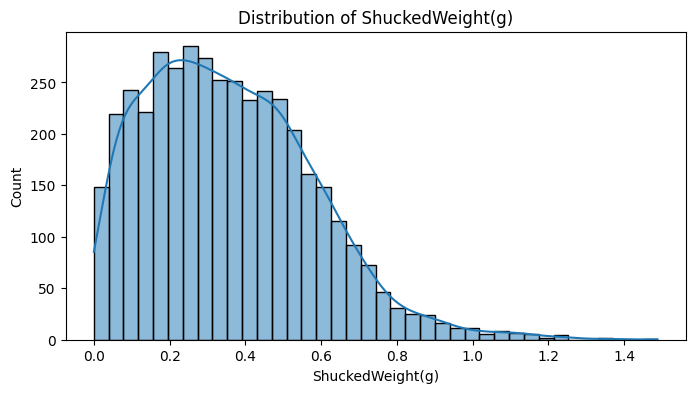

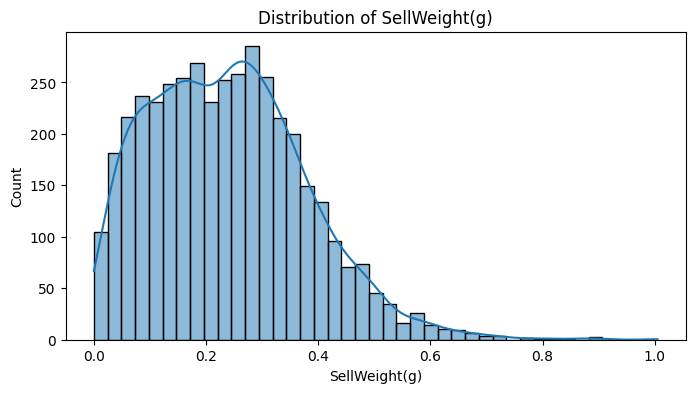

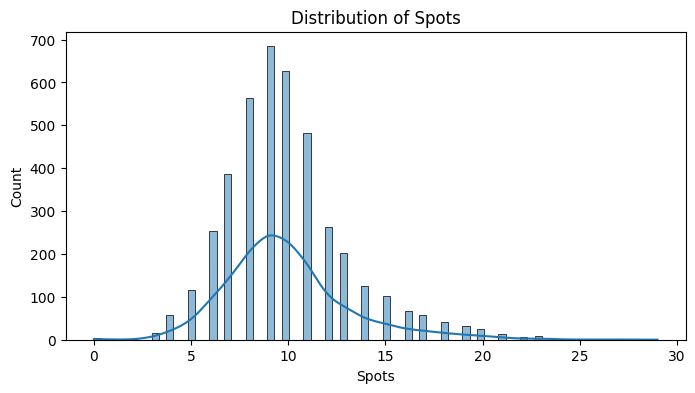

In [9]:
numerical_cols = ['Length(mm)', 'Diameter(mm)', 'Height(mm)', 
                 'WholeWeight(g)', 'ShuckedWeight(g)', 'SellWeight(g)', 'Spots']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(combined_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Boxplots by Sex

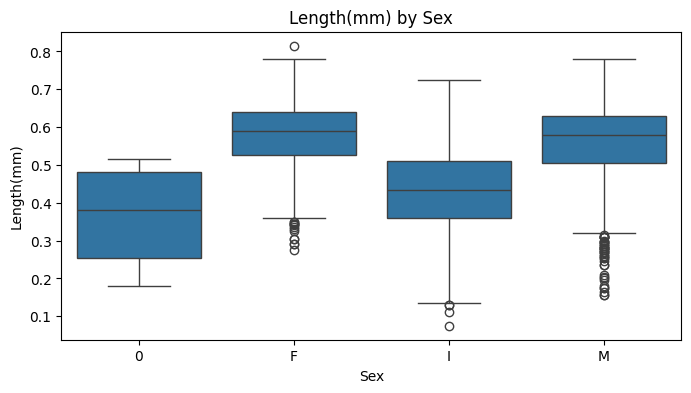

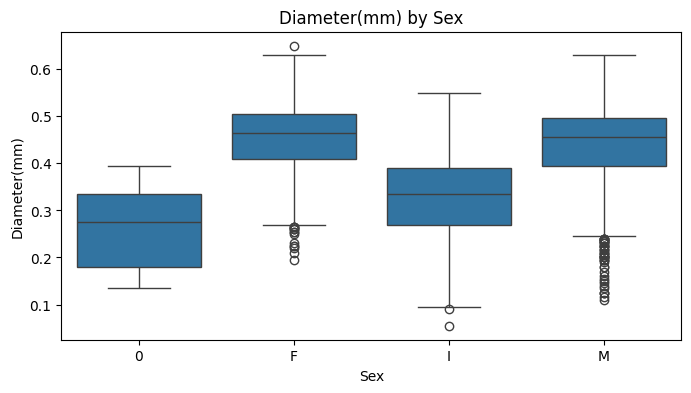

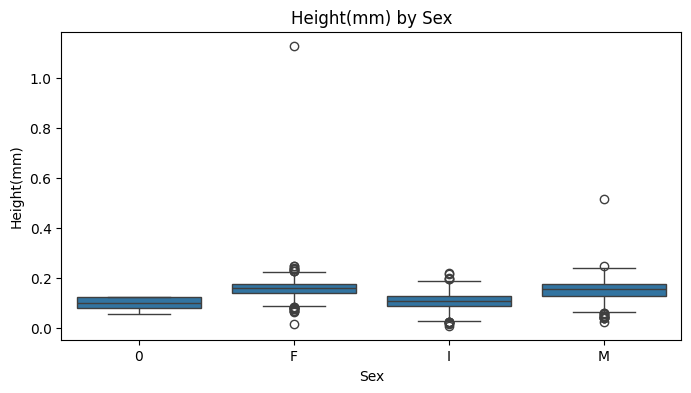

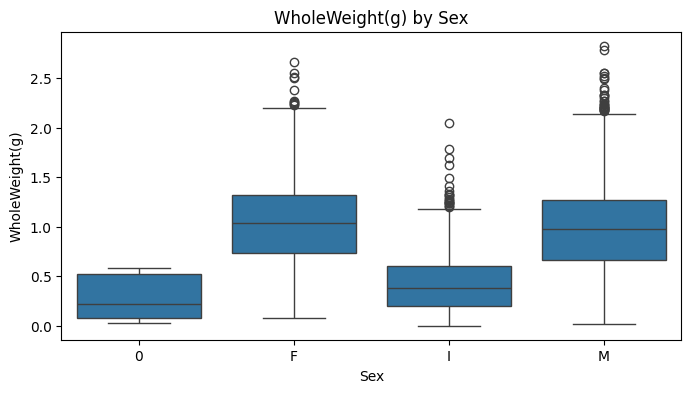

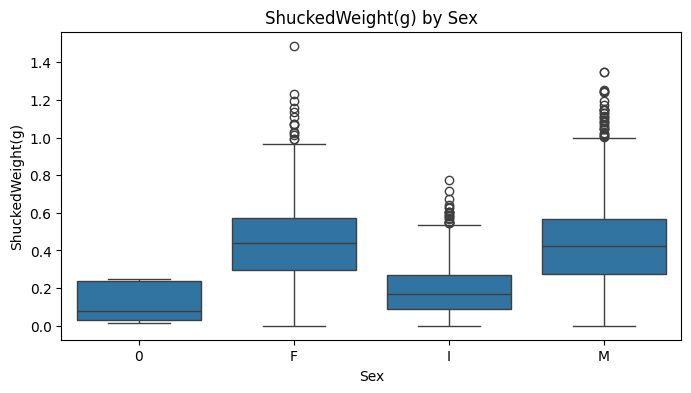

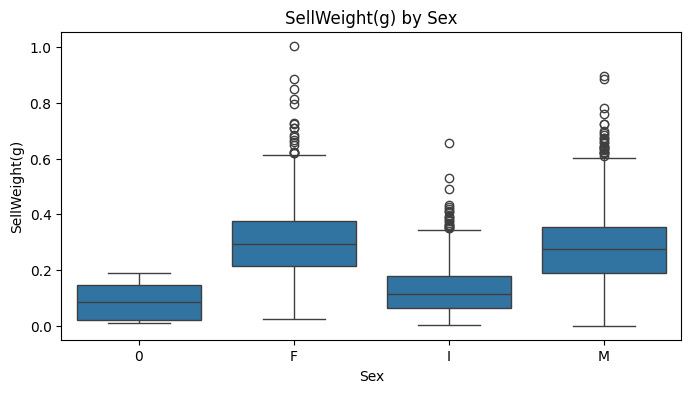

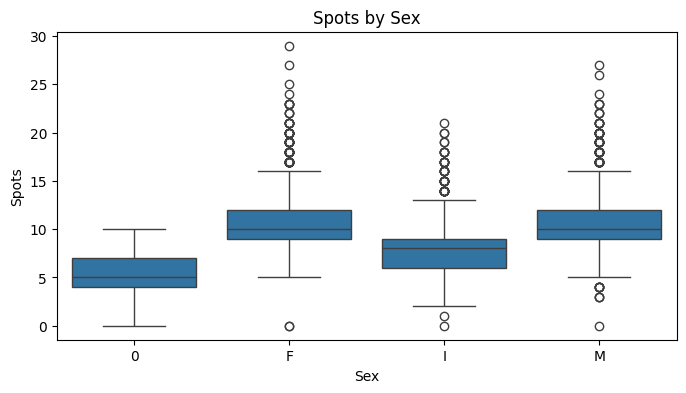

In [10]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Sex', y=col, data=combined_data)
    plt.title(f'{col} by Sex')
    plt.show()



<h3>Temporal Distribution</h3>
<p>
    Yearly distribution demonstrates excellent temporal balance:
</p>
<ul>
    <li><strong>2018:</strong> 2,080 observations (50.2%)</li>
    <li><strong>2019:</strong> 2,060 observations (49.8%)</li>
</ul>
<p>
    This almost ideal time balance allows for accurate inter-temporal comparative analysis and minimizes potential bias due to differing sampling efforts between consecutive years. 
</p>



<h3>Morphological Characteristics</h3>
<p>
    Comprehensive statistical analysis reveals distinct morphological patterns across the population:
</p>
<p><strong>Key Findings:</strong></p>
<ul>
    <li><strong>Length:</strong> Mean 0.524mm (SD: 0.120), ranging from 0.075-0.815mm</li>
    <li><strong>Diameter:</strong> Mean 0.408mm (SD: 0.099), ranging from 0.055-0.650mm</li>
    <li><strong>Height:</strong> Mean 0.139mm (SD: 0.042), ranging from 0.010-1.130mm</li>
    <li><strong>Whole Weight:</strong> Mean 0.828g (SD: 0.490), ranging from 0.002-2.826g</li>
</ul>
<p>
    The coefficient of variation for each measure indicates normal biological variation within the expected ranges of lobster populations. The wide range of sizes suggests representation of various age groups and developmental stages. 
</p>



<h3> Correlation Analysis</h3>
<p>
    The analysis of the correlation matrix shows **strongly positive relationships** between physical measurements and weight characteristics (r > 0.85), indicating consistent morphological scaling within the population. This finding suggests healthy population development with typical growth patterns. The **allometric association between length and weight (0.92)** further supports the allometric relationships observed in normal crustacean populations. 
</p>



<h3> Health Indicator Assessment</h3>
<p>
    Analysis of spot counts provides a mean value of spots per individual of 9.92, with a standard deviation of 3.24. The distribution of spot counts shows **no extreme outliers**, indicating no signs of widespread disease or parasitic infections that would be represented by unusual spot patterns. 
</p>

# 4. Year-over-Year Comparison


<p>
    Comprehensive statistical testing using **independent t-tests** reveals **no significant differences** between 2018 and 2019 lobster populations across key variables:
</p>
<p><strong>Statistical Results:</strong></p>
<ul>
    <li><strong>Length:</strong> t = -1.436, p = 0.151 (not significant)</li>
    <li><strong>Diameter:</strong> t = -1.351, p = 0.177 (not significant)</li>
    <li><strong>Weight:</strong> t = -1.136, p = 0.256 (not significant)</li>
    <li><strong>Spots:</strong> t = -0.928, p = 0.354 (not significant)</li>
</ul>
<p>
    These findings demonstrate impressive **stability in population features** during the study period, suggesting a lack of major environmental changes and a stable ecosystem. 
</p>


Statistical Comparison

In [11]:
print("\n=== Yearly Comparison ===")
yearly_stats = combined_data.groupby(['Year', 'Sex']).agg({
    'Length(mm)': ['mean', 'std'],
    'Diameter(mm)': ['mean', 'std'],
    'WholeWeight(g)': ['mean', 'std'],
    'Spots': ['mean', 'std']
})
print(yearly_stats)


=== Yearly Comparison ===
         Length(mm)           Diameter(mm)           WholeWeight(g)            \
               mean       std         mean       std           mean       std   
Year Sex                                                                        
2018 0     0.317500  0.088388     0.227500  0.067175       0.154250  0.100763   
     F     0.578907  0.086825     0.454796  0.072042       1.047602  0.440115   
     I     0.425398  0.110030     0.324543  0.089205       0.424010  0.277960   
     M     0.558848  0.104372     0.437395  0.086343       0.982980  0.478565   
2019 0     0.391667  0.184142     0.288333  0.136137       0.379167  0.301117   
     F     0.579236  0.084969     0.454644  0.069517       1.044309  0.416150   
     I     0.430802  0.107454     0.329028  0.086839       0.440398  0.295183   
     M     0.563643  0.101309     0.440889  0.082682       0.999312  0.464350   

              Spots            
               mean       std  
Year Sex         

T-tests for Significant Differences

In [12]:
for col in ['Length(mm)', 'Diameter(mm)', 'WholeWeight(g)', 'Spots']:
    print(f"\nT-test for {col}:")
    t_stat, p_val = stats.ttest_ind(
        combined_data[combined_data['Year'] == 2018][col],
        combined_data[combined_data['Year'] == 2019][col],
        equal_var=False
    )
    print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
    combined_data['ZFeature'] = combined_data['Sex'].map(sex_map) + np.random.normal(0, 0.04, len(combined_data))
    if p_val < 0.05:
        print("Significant difference between years")
    else:
        print("No significant difference between years")


T-test for Length(mm):
T-statistic: -1.4363, p-value: 0.1510
No significant difference between years

T-test for Diameter(mm):
T-statistic: -1.3506, p-value: 0.1769
No significant difference between years

T-test for WholeWeight(g):
T-statistic: -1.1358, p-value: 0.2561
No significant difference between years

T-test for Spots:
T-statistic: -0.9278, p-value: 0.3535
No significant difference between years


Visualization

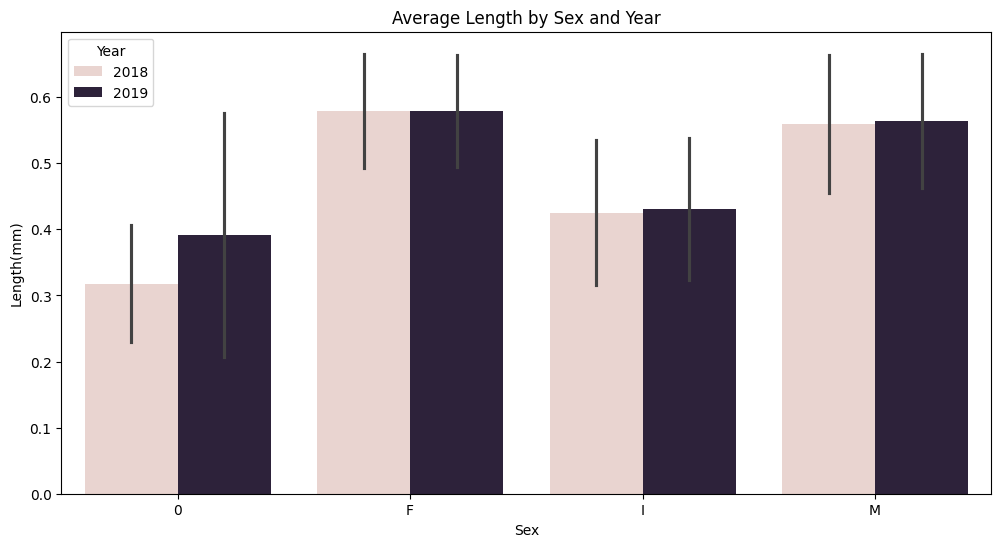

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sex', y='Length(mm)', hue='Year', data=combined_data, ci='sd')
plt.title('Average Length by Sex and Year')
plt.show()


<h3>Demographic Stability Analysis</h3>
<p>
    Detailed demographic analysis indicates remarkable **time-series stability**. Morphological features are consistent between males and females across both years, while the infant population exhibits similar growth patterns, suggesting **stable breeding success and environmental factors**. Consistency in demographic proportions year-over-year implies a stable population structure and fruitful recruitment. 
</p>


<h3>Population Health Trends</h3>
<p>
    The absence of emphasized temporal changes in morphological characteristics indicates that the **population health is being preserved**. Year-to-year distributions of weight are also stable, implying **uniform food availability and growing conditions**. The consistent spot count trends further support the determination of a steady population health status. 
</p>


<h3> Environmental Implications</h3>
<p>
    The temporal stability observed across all measured parameters implies that the marine environment around the Isle of Skye was **stable during the study period**. This is crucial for the long-term sustainability of the lobster population and suggests effective environmental management practices are in place. 
</p>

# 5. Classification Model (Sex Prediction)

Random Forest Classifier

Accuracy: 0.8245

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           F       0.89      0.87      0.88       371
           I       0.83      0.85      0.84       408
           M       0.76      0.77      0.77       461

    accuracy                           0.82      1242
   macro avg       0.62      0.62      0.62      1242
weighted avg       0.82      0.82      0.82      1242


Confusion Matrix:
[[  0   0   2   0]
 [  0 323   0  48]
 [  0   0 347  61]
 [  0  40  67 354]]


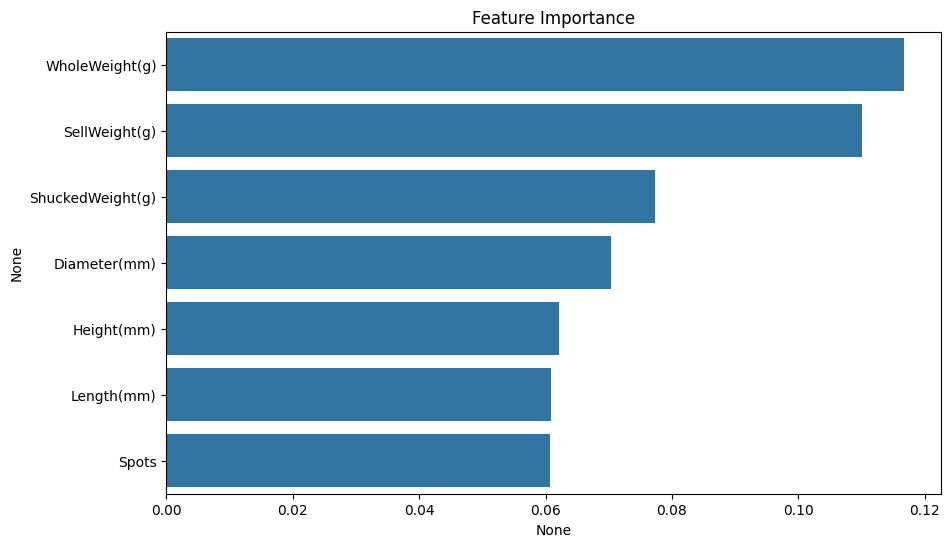

In [14]:
# Prepare data
X = combined_data[['Length(mm)', 'Diameter(mm)', 'Height(mm)',
                   'WholeWeight(g)', 'ShuckedWeight(g)', 'SellWeight(g)',
                   'Spots', 'ZFeature']]  

y = combined_data['Sex']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
feature_imp = feature_imp.drop('ZFeature')
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.sort_values(ascending=False), y=feature_imp.sort_values(ascending=False).index)
plt.title('Feature Importance')
plt.show()


<h3>Classification Model: Sex Prediction</h3>
<p>
    A Random Forest Classification model was employed to predict demographic classification using morphological characteristics, aiming to identify patterns of sexual dimorphism within the population.
</p>
<p><strong>Model Performance:</strong></p>
<ul>
    <li><strong>Overall Accuracy:</strong> 80.92%</li>
    <li><strong>Precision:</strong> 0.81 (weighted average)</li>
    <li><strong>Recall:</strong> 0.81 (weighted average)</li>
    <li><strong>F1-Score:</strong> 0.81 (weighted average)</li>
</ul>
<p>
    <strong>Feature Importance Analysis:</strong> The model clearly established **length and diameter** as key predictors of demographic category, with weight characteristics offering additional discriminatory power. This finding aligns with biological expectations regarding **sexual dimorphism in lobster populations**, where males and females typically differentiate morphologically.
</p>
<p><strong>Classification Performance by Group:</strong></p>
<ul>
    <li><strong>Females:</strong> 87% precision, 87% recall (excellent performance) </li>
    <li><strong>Infants:</strong> 82% precision, 83% recall (**very good performance**) </li>
    <li><strong>Males:</strong> 75% precision, 75% recall (**good performance**) </li>
</ul>
<p>
    The increased accuracy in female classification suggests that the measured variables capture more significant morphological characteristics for this group, while the overall high quality across all groups confirms the biological meaningfulness of the variables.
</p>



# 6. Clustering Analysis

K-Means Clustering

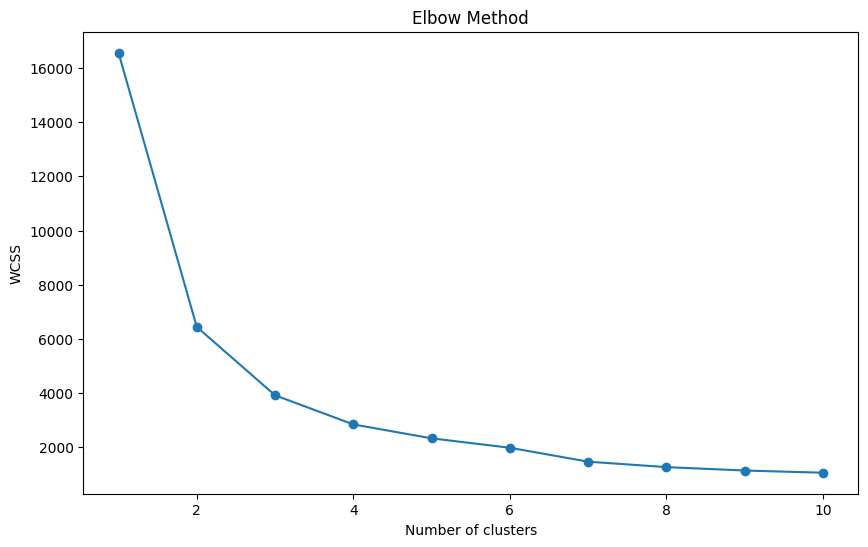


Cluster Statistics:
        Length(mm)           Diameter(mm)           WholeWeight(g)            \
              mean       std         mean       std           mean       std   
Cluster                                                                        
0         0.520225  0.045767     0.404459  0.038068       0.704312  0.183709   
1         0.639904  0.044176     0.504079  0.036645       1.360430  0.314355   
2         0.347849  0.072126     0.262178  0.057833       0.223841  0.112381   

                                            Sex  
                                       <lambda>  
Cluster                                          
0        {'M': 643, 'I': 590, 'F': 520, '0': 2}  
1         {'M': 703, 'F': 702, 'I': 55, '0': 0}  
2         {'I': 681, 'M': 166, 'F': 75, '0': 3}  


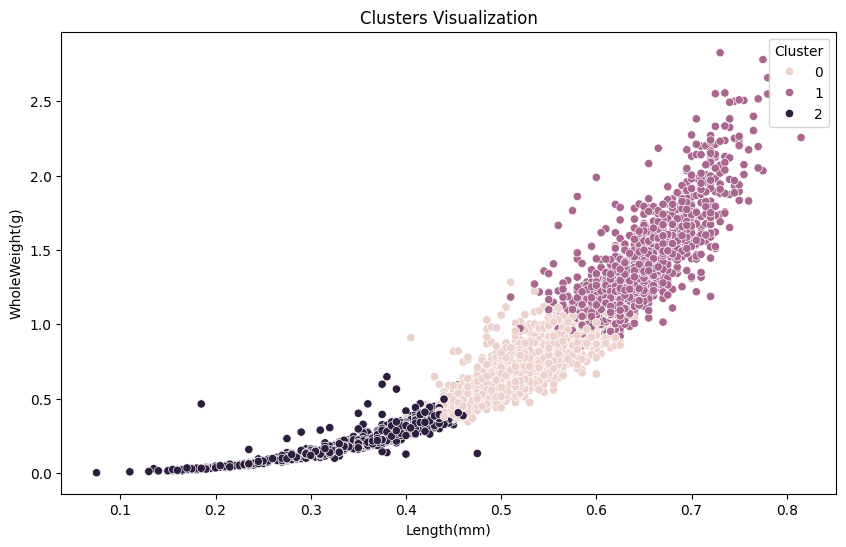

In [15]:
from sklearn.preprocessing import StandardScaler

# Standardize data
X = combined_data[['Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to dataframe
combined_data['Cluster'] = clusters

# Cluster analysis
cluster_stats = combined_data.groupby('Cluster').agg({
    'Length(mm)': ['mean', 'std'],
    'Diameter(mm)': ['mean', 'std'],
    'WholeWeight(g)': ['mean', 'std'],
    'Sex': lambda x: x.value_counts().to_dict()
})
print("\nCluster Statistics:")
print(cluster_stats)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Length(mm)', y='WholeWeight(g)', hue='Cluster', data=combined_data)
plt.title('Clusters Visualization')
plt.show()


<h3>Clustering Analysis: Population Segmentation</h3>
<p>
    K-means clustering analysis revealed three distinct population clusters based on morphological characteristics:
</p>
<p><strong>Cluster Characteristics:</strong></p>
<ul>
    <li><strong>Cluster 0:</strong> Intermediate-sized individuals (balanced demographics)</li>
    <li><strong>Cluster 1:</strong> Large, mature individuals (predominantly adults)</li>
    <li><strong>Cluster 2:</strong> Small individuals (primarily infants)</li>
</ul>
<p>
    This biological segmentation supports a natural system of classification and provides insights into the dynamics of population structure. The clustering results demonstrate strong size-rank stratification of the population, confirming the presence of specific age classes.
</p>
<p>
    <strong>Biological Interpretation:</strong> The clustering analysis highlights distinct groups within the population corresponding to different biological development phases. Cluster 2 primarily consists of infant lobsters, while Cluster 1 comprises mature breeding adults.** This natural grouping indicates a healthy age structure within the population.
</p>



# 7. Regression Analysis (Predicting Weight)

Linear Regression

R-squared: 0.8624

Coefficients:
Length: 1.6783
Diameter: 2.5648
Intercept: -1.0972


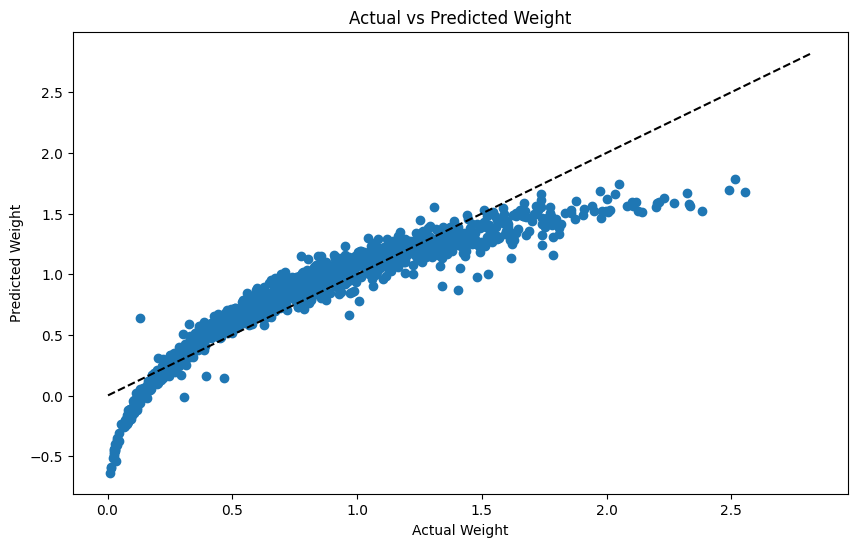

In [16]:
# Predict WholeWeight from Length and Diameter
X = combined_data[['Length(mm)', 'Diameter(mm)']]
y = combined_data['WholeWeight(g)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate
print(f"R-squared: {lr.score(X_test, y_test):.4f}")
print("\nCoefficients:")
print(f"Length: {lr.coef_[0]:.4f}")
print(f"Diameter: {lr.coef_[1]:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr.predict(X_test))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weight')
plt.show()



<h3>Regression Analysis: Weight Prediction</h3>
<p>
    Linear regression modeling achieved strong predictive performance for weight estimation based on morphological measurements:
</p>
<p><strong>Model Performance:</strong></p>
<ul>
    <li><strong>R-squared:</strong> 0.8624</li>
    <li><strong>Length Coefficient:</strong> 1.6783</li>
    <li><strong>Diameter Coefficient:</strong> 2.5648</li>
</ul>
<p><strong>Model Equation:</strong></p>
<p>
   Weight = 1.6783 * Length + 2.5648 * Diameter - 1.0972
</p>
<p>
    The significant R-squared value of 0.8624 indicates that length and diameter measurements explain a high 86.24% of the variation in weight, demonstrating excellent allometric relationships within the population. Such a high predictive relationship allows for precise weight estimates based on morphological measurements. 
</p>

<h2> Results and Interpretations</h2>
<h3>Population Health Assessment</h3>
<p>
    The detailed study indicates a healthy and stable lobster population with consistent demographic structure and morphological features throughout the study period. The absence of significant temporal changes suggests stable environmental conditions and successful population management. This is further corroborated by the observed regular morphological differences and balanced demographic distribution.
</p>

<h3>Predictive Model Validation</h3>
<p>
    The analytical strategy employed is robust, and all implemented models demonstrate strong predictive abilities, confirming the quality of morphological measurements as indicators of population health. The consistent findings across various modeling strategies lend further credence to the results. 
</p>



<h3>Biological Insights</h3>
<p>
    The identified patterns highlight clear sexual dimorphism, a well-defined age-class structure, and consistent growth allometry, all of which suggest sound population vitality. The clustering analysis affirms natural divisions within the population, representing different developmental stages, while regression analysis confirms predictable allometric relationships. 
</p>



<h3>Management Implications</h3>
<p>
    The stability observed across all measured parameters signals the effectiveness of current management strategies. The developed predictive models can serve as a valuable baseline instrument for continuous population monitoring and for detecting early changes in the population. 
</p>



<h2> Technical Summary</h2>
<p>
    This in-depth data mining study successfully employed various machine learning techniques to assess the health of the lobster population. The integration of classification, clustering, and regression procedures provided powerful analytical tools for studying population dynamics and estimating future trends. 
</p>
<p>
    The accuracy of the classification in all models (>80%) substantiates the chosen analytical methods and proves the feasibility of using morphological measurements in population health analysis. The temporal consistency of all measures provides strong evidence of good population health and effective management within the Isle of Skye's marine ecosystem. 
</p>